In [1]:
# Project: Working with weather station data available on https://www.ncdc.noaa.gov/cdo-web/datasets


In [2]:
import pathlib
import pandas as pd
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "Documents" / "Automating GIS" / "Vancouver"

In [3]:
# Uploading CSV file using csv module

import csv

filename = DATA_DIRECTORY / "Vancouver_2022_v2.csv"
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

# Checking column names and their indexes
for index, column_name in enumerate(header_row):
    print(index, column_name)

0 STATION
1 NAME
2 LATITUDE
3 LONGITUDE
4 ELEVATION
5 DATE
6 PRCP
7 TAVG
8 TMAX
9 TMIN


In [4]:
# Selecting average temperature, maximum and minimum daily temperature from Vancouver Harbour station (station number = CA001108446)
from datetime import datetime

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    harbour_highs, harbour_lows, dates, harbour_avg_temp = [], [], [], []

    for row in reader:
        station = row[0]
        date = datetime.strptime(row[5], "%Y-%m-%d")
        avg_temp = row[7]
        high = row[8]
        low = row[9]
        if station == 'CA001108446':
            dates.append(date)
            harbour_avg_temp.append(avg_temp)
            harbour_highs.append(high)
            harbour_lows.append(low)

In [5]:
# Converting data from Fahrenheit to Celsius

def Fahrenheit_to_Celsius(values):
    new_list_C = []
    for value in values:
        celsius = round((int(value)-32)/1.8)
        new_list_C.append(celsius)
    return new_list_C

harbour_highs_C = Fahrenheit_to_Celsius(harbour_highs)
harbour_lows_C = Fahrenheit_to_Celsius(harbour_lows)
harbour_avg_temp_C = Fahrenheit_to_Celsius(harbour_avg_temp)
        

In [6]:
# Calculating monthly average temperature

# Creating DataFrame with dates and average temperatures
avg_temp_dates = pd.DataFrame({'date': dates, 'avg_temp': harbour_avg_temp_C})

#S plitting a Date Column ino Separate Day, Month, Year
avg_temp_dates['day'] = avg_temp_dates['date'].dt.day
avg_temp_dates['month'] = avg_temp_dates['date'].dt.month
avg_temp_dates['year'] = avg_temp_dates['date'].dt.year

print(avg_temp_dates)

# Calculation
avg_temp = avg_temp_dates.groupby('month').mean()['avg_temp']

avg_temp_list = avg_temp.values.tolist()

avg_temp_list_rounded = []

for value in avg_temp_list:
    rounded = round(value,2)
    avg_temp_list_rounded.append(rounded)

print(avg_temp_list_rounded)

          date  avg_temp  day  month  year
0   2022-01-01         0    1      1  2022
1   2022-01-02         3    2      1  2022
2   2022-01-03         4    3      1  2022
3   2022-01-04         3    4      1  2022
4   2022-01-05         0    5      1  2022
..         ...       ...  ...    ...   ...
355 2022-12-27         8   27     12  2022
356 2022-12-28         7   28     12  2022
357 2022-12-29         6   29     12  2022
358 2022-12-30         8   30     12  2022
359 2022-12-31         7   31     12  2022

[360 rows x 5 columns]
[4.84, 5.64, 7.77, 8.9, 11.87, 16.28, 19.68, 21.06, 17.04, 13.23, 5.47, 3.03]


Text(0.5, 1.0, 'Average daily temperature - 2022\nVancouver, Canada [℃]')

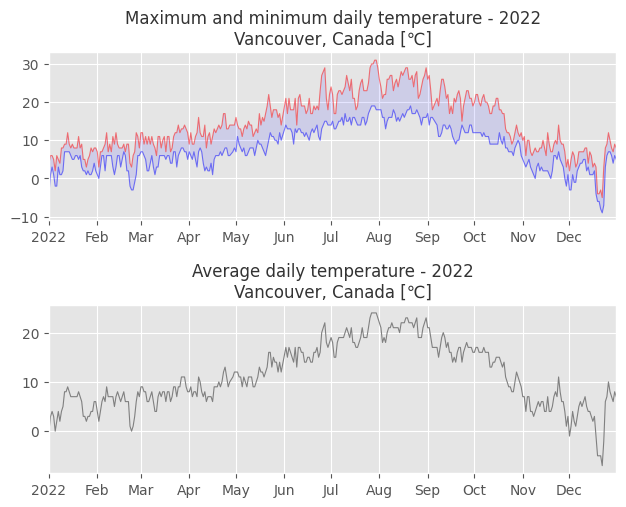

In [7]:
# Plotting the data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import math

plt.style.use('ggplot')
fig, ax = plt.subplots(2)

# Adjusting space between the graphs
fig.tight_layout(h_pad=4)

# Converting dates to be shown as name of the months
plt.rcParams['date.converter'] = 'concise'

# Maximum and minimum daily temperature - 2022
# Plotting max and min tempertures
ax[0].plot(dates, harbour_highs_C, c='red', linewidth=0.8, alpha=0.5)
ax[0].plot(dates, harbour_lows_C, c='blue', linewidth=0.8, alpha=0.5)

# Setting x axis range
date_min = datetime(2022, 1, 1)
date_max = datetime(2022, 12, 31)
ax[0].set_xlim(date_min, date_max)

# Filling space between the axises
ax[0].fill_between(dates, harbour_highs_C, harbour_lows_C, facecolor='blue', alpha=0.1)

# Setting the title
ax[0].set_title("Maximum and minimum daily temperature - 2022\nVancouver, Canada [℃]", fontsize = 12, alpha=0.8)

# Average daily temperature
ax[1].plot(dates, harbour_avg_temp_C, c='grey', linewidth=0.8)
ax[1].set_xlim(date_min, date_max)
ax[1].set_title("Average daily temperature - 2022\nVancouver, Canada [℃]", fontsize = 12, alpha=0.8)

In [8]:
print(avg_temp_list_rounded)

[4.84, 5.64, 7.77, 8.9, 11.87, 16.28, 19.68, 21.06, 17.04, 13.23, 5.47, 3.03]


In [9]:
# Average monthly temperature table

avg_temp_table = pd.DataFrame(avg_temp_list_rounded, index=pd.date_range(start="2022-01-01", periods=12), columns=["avg_temp [℃]"])
avg_temp_table


,avg_temp [℃]
2022-01-01,4.84
2022-01-02,5.64
2022-01-03,7.77
2022-01-04,8.90
2022-01-05,11.87
2022-01-06,16.28
2022-01-07,19.68
2022-01-08,21.06
2022-01-09,17.04
2022-01-10,13.23
